# Assignment Six
---
Oisín Morrison - 15/01/20 - Hw6.ipynb

---

This assignment is in relation to the investigation of radioactive decay using Monte Carlo methods.

In [1]:
#standard imports for data science with python
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

## Task 1
Simulate the radioactive decay of a large initial number of atoms $N_0$, by using a random number to test whether or not an atom has decayed in a time step. For the initial sample take the decay probability $p = 0.05$ per second (a 5% chance of decay in 1 second). For each time step, calculate $\operatorname{N}(t)$, and also $\operatorname{D}(t)$, the number of daughter atoms (intially zero) and plot the results as points. If you start with a large enough number of initial atoms, you should obtain a plot that looks like the familar exponential decay curve. Estimate the half-life from your numerical experiment and compare it to the theoretical expectation.

To do this, I shall execute the following steps:
- Create a function that will calculate the number of mother atoms for a number of times using a Monte Carlo method. The number of daughter atoms will simply be $N_0$ minus the number of mother atoms at any time.
- I shall plot the expected number of mother atoms also, using the formula:
$$\operatorname{N}\left(t\right)=N_0 e^{-\lambda t} \text{, where } \lambda = \operatorname{ln}\left(\frac{1}{1-p}\right)$$
and obviously the expected number of daughter atoms will just be $N_0-\operatorname{N}\left(t\right)$.
- I shall plot all of these arrays on a graph to judge how well my Monte Carlo method is working.
- Once I am happy with my graph, I shall write a quick bit of code to find the half life from my Monte Carlo method. I shall then compare this to the expected half life of $\frac{\operatorname{ln}(2)}{\lambda}$. I shall discuss and comment.

In [2]:
#function as specified in markdown
def Simple_Radioactive_Decay(N_0, p, times):
    """function which will return list of times and number of radioactive atoms at each of those times.
    takes as inputs the initial number of atoms, the probability of decay per unit time, and the number of unit times to execute for
    """
    t, N = [0], [N_0] #set initial values
    for j in range(times): #for each time
        atom_number=N[-1] #check number of atoms during last time
        for i in range(N[-1]): #for each atom
            if (np.random.rand()<p): #check if decayed
                atom_number-=1 #if so, number of radioactive atoms goes down one
        t.append(t[-1]+1) #append new time
        N.append(atom_number) #append new number of atoms
    return t,N #return lists of times and number of radioactive atoms

In [3]:
N_0, p, times = 1000,0.05,150 #setting inputs as variables so I can change them quickly

In [4]:
a,b=Simple_Radioactive_Decay(N_0, p, times) #call function to get lists

In [5]:
def Analytic_Decay(N_0, p, t):
    """function that returns the expected number of atoms at a time t given initial number of atoms and decay probability"""
    decay_const=np.log(1/(1-p))
    return N_0*np.exp(-decay_const*t)

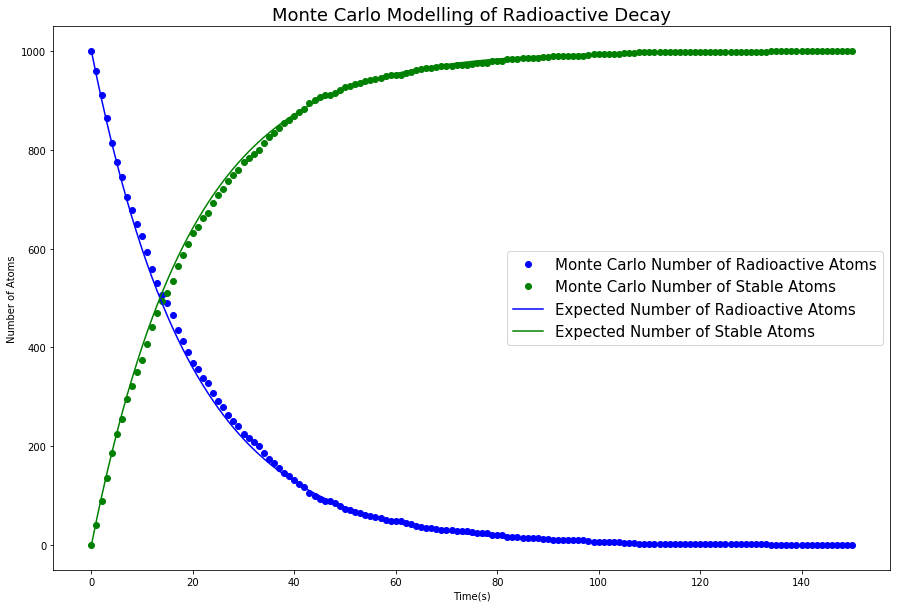

In [6]:
fig, ax = plt.subplots(figsize=(15,10)) #initialise plot as normal
mpl.rcParams.update({'font.size':15}) #make font bigger to match figsize
ax.plot(a,b, 'bo', label="Monte Carlo Number of Radioactive Atoms") #plot number of radioactive atoms from Monte Carlo
ax.plot(a,N_0-np.array(b), 'go', label="Monte Carlo Number of Stable Atoms") #plot stable atoms from Monte Carlo

#plot the analytic expectation for comparison
analytic_array=list(map(lambda t: Analytic_Decay(N_0, p, t), a))#not actually an array but you get the point
ax.plot(a, analytic_array, 'b-', label="Expected Number of Radioactive Atoms")
ax.plot(a, N_0-np.array(analytic_array), 'g-', label="Expected Number of Stable Atoms")


#labelling
ax.set(xlabel='Time(s)',ylabel= 'Number of Atoms', title="Monte Carlo Modelling of Radioactive Decay")
ax.legend()

Plot looks good to me as is - our Monte Carlo approximation matches the expectations very well. As such, I'll move on.

In [7]:
print(np.argmin(abs(np.array(b)-0.5*N_0))) #nice one line to find time when number of atoms closest to a half via Monte Carlo

14


In [8]:
print(np.log(2)/np.log(1/(1-p))) #expected half life

13.5134073339649


So, we have found very quickly that the half life from our data is $14 \pm 1$ seconds, which agrees with the expected value of $13.5134073339649$ seconds. I could go change my time step and find a more accurate value, but my percentage error is about 7% anyhow, which is small. As such, I think there is no need to go messing about with finding new decay probabilities in order to cut down an already small error.

Nevertheless, if we wanted to change our time steps to n seconds, our probability of decay would be given by:
$$p_{new}=1−\left(1−p\right)^n$$
i.e. 1 minus the probability none decay in that time interval. So, for example, if we had a 50% of decay in one time step, doubling our time step would now give us a 75% chance of decay. Likewise, halving the time step would give us a probability of decay of around 30%. You can see this is tedious but easily done, however I think a percentage error of 7% as is suffices.

## Task 2

Now consider that the daughter species is also radioactive and decays with $p = 0.02$ per second. Plot the mother, daughter and grandaughter species as a function of time. Estimate the time at which the daughter population reaches a peak. To do this accurately, you may need to increase the time resolution in your simulation, which will mean the decay probability will change.

To do this, I shall execute the following steps:
- Create a function that will calculate the number of mother atoms and daughter atoms for a number of times using a Monte Carlo method. The number of stable atoms will simply be $N_0$ minus the number of mother and daughter atoms at any time.
- I shall plot the expected number of mother atoms also, using the formula:
$$\operatorname{N}\left(t\right)=N_0 e^{-\lambda_1 t} \text{, where } \lambda_1 = \operatorname{ln}\left(\frac{1}{1-p_m}\right)$$ 
I shall also plot the number of daughter atoms, given by:
$$\operatorname{D}\left( t \right) = \frac{ \lambda_1 N_0 }{ \lambda_1-\lambda_2 } \left( e^{-\lambda_2 t}-e^{-\lambda_1 t}\right) \text{, where } \lambda_2 = \operatorname{ln}\left(\frac{1}{1-p_d}\right)$$
Obviously the expected number of stable atoms will just be $N_0-\operatorname{N}\left(t\right)-\operatorname{D}\left(t\right)$, and I will plot this too.
- I shall plot all of these arrays on a graph to judge how well my Monte Carlo method is working.
- Once I am happy with my graph, I shall write a quick bit of code to find the time at which the number of daughter atoms peak. I shall then increase my time resolution to gain a more accurate look and I will come up with a final answer with uncertainty and discuss.

In [9]:
#function as specified in markdown
def Mother_Daughter_Radioactive_Decay(N_0, p_m, p_d, times):
    """function which will return list of times and number of radioactive mother and daughter atoms at each of those times.
    takes as inputs the initial number of mother atoms, the probabilities of decay per unit time, and the number of unit times to execute for
    """
    t, N_m, N_d = [0], [N_0], [0] #set initial values
    for j in range(times): #for each time
        m_number=N_m[-1] #find number of mother atoms after last time
        d_number=N_d[-1] #find number of daughter atoms after last time
        for i in range(N_m[-1]): #for each mother atom at beginning of time step
            if (np.random.rand()<p_m): #check if decayed
                m_number-=1 #if so, decrease number of mother atoms
                d_number+=1 #if so, increase number of daughter atoms
        #note that I'm not allowing a mother atom to decay to a daughter atom and then decay again to a stable atom in one time step
        for i in range(N_d[-1]): #for each daughter atom at beginning of time step
            if (np.random.rand()<p_d): #check if decayed
                d_number-=1 #if so, subtract number of daughter atoms by 1
        t.append(t[-1]+1) #append new time
        N_m.append(m_number) #append new number of mother atoms
        N_d.append(d_number) #append new number of daughter atoms
    return t,N_m, N_d #return our lists

In [10]:
N_0, p_m, p_d, times = 10000, 0.05, 0.02, 300 #set variables in code so can easily change if needed

In [11]:
a,b,c=Mother_Daughter_Radioactive_Decay(N_0, p_m, p_d, times) #get our lists

In [12]:
def Analytic_Decay_2(N_0, p_m, p_d, t):
    """function that returns the expected number of daughter atoms at a time t given initial number of atoms and decay probabilities"""
    lambda_1=decay_const=np.log(1/(1-p_m))
    lambda_2=decay_const=np.log(1/(1-p_d))
    return lambda_1*N_0/(lambda_1-lambda_2) * (np.exp(-lambda_2*t)-np.exp(-lambda_1*t))

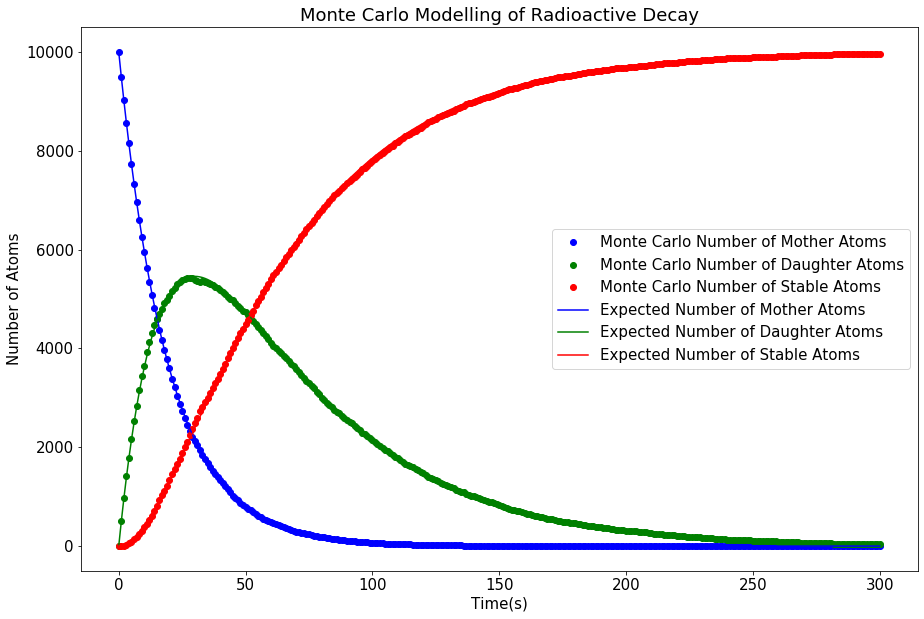

In [13]:
fig, ax = plt.subplots(figsize=(15,10)) #initialise plot as normal
mpl.rcParams.update({'font.size':15}) #make font bigger to match figsize
ax.plot(a,b, 'bo', label="Monte Carlo Number of Mother Atoms") #plot number of mother atoms from Monte Carlo
ax.plot(a,c, 'go', label="Monte Carlo Number of Daughter Atoms") #plot number of daughter atoms from Monte Carlo
ax.plot(a,N_0-np.array(b)-np.array(c), 'ro', label="Monte Carlo Number of Stable Atoms") #plot stable atoms from Monte Carlo

#plot analytic expectations for comparison
mother_analytic_array=list(map(lambda t: Analytic_Decay(N_0, p_m, t), a)) #not actually an array but you get the point
daughter_analytic_array=list(map(lambda t: Analytic_Decay_2(N_0, p_m, p_d, t), a)) #not actually an array but you get the point
ax.plot(a, mother_analytic_array, 'b-', label="Expected Number of Mother Atoms")
ax.plot(a, daughter_analytic_array, 'g-', label="Expected Number of Daughter Atoms")
ax.plot(a, N_0-np.array(mother_analytic_array)-np.array(daughter_analytic_array), 'r-', label="Expected Number of Stable Atoms")

#labelling
ax.set(xlabel='Time(s)',ylabel= 'Number of Atoms', title="Monte Carlo Modelling of Radioactive Decay")
ax.legend()

Plot looks good to me as is - our Monte Carlo approximation matches the expectations very well. As such, I'll move on.

In [14]:
#I realised I could make a completely general function, so I did.
#However, I won't bother with labelling since this is extra than required.
#I do however use it later since it's just a superior version of my Mother_Daughter_Radioactive_Decay function
def General_Radioactive_Decay(N_0, p, times):
    t, N = [0], [[0] for x in range(len(p))]
    N[0][0]=N_0
    for j in range(times):
        current_numbers=[N[x][-1] for x in range(len(p))] # OR current_numbers=list(map(lambda x: N[x][-1], range(2)))
        for prob_index in range(len(p)):
            prob=p[prob_index]
            for i in range(N[prob_index][-1]):
                if (np.random.rand()<prob):
                    current_numbers[prob_index]-=1
                    if (prob_index+1 != len(p)):
                        current_numbers[prob_index+1]+=1
        t.append(t[-1]+1)
        for x in range(len(p)):
            N[x].append(current_numbers[x])
    return t,N

In [15]:
print(np.array(c).argmax()) #simple one line to find the time at which our Monte Carlo number of daughter atoms peaks

27


We thus obtain that the number of daughter atoms peaks at 27 seconds. As per instructions, I'll try using a smaller time step - namely 0.1 seconds. To do, I'll be using $$p_{new}=1−\left(1−p\right)^{0.1}$$.

In [16]:
N_0, p_m, p_d, times = 10000, 1-0.95**0.1, 1-0.98**0.1, 500 #set variables in code so can easily change if needed

In [17]:
a,b,c=Mother_Daughter_Radioactive_Decay(N_0, p_m, p_d, times) #get our lists

In [18]:
print(np.array(c).argmax()/10) #simple one line to find the time at which our Monte Carlo number of daughter atoms peaks

29.7


We can thus be quite confident that the true value is $29 \pm 2$ seconds. This has a percentage of about 6%, which I think is acceptable.

## Task 3

Consider a 1-D nuclear reactor shield that is B atoms thick. A large flux of neutrons from a nuclear reactor core impacts the shield, and at each atomic layer there is a probability that a neutron will be absorbed. If a neutron is not absorbed, it continues to the next atom. The thickness of the shield (the value of B) needs to be sufficient to reduce the flux of neutrons to an acceptable and safe value.

Estimate, by a Monte Carlo method, the value of B required to reduce the exit flux of neutrons to 50% of the incident flux. Take the absorption probability, p at each atom to be 3%. The initial number of incident neutrons should be a number large enough to give an accurate answer but not so large that the computational time becomes excessive.

To do this, I shall complete the following:
- Run my General_Radioactive_Decay function from Task 2 with a large initial number of neutrons flux e.g 5000 units.
- Write a piece of code to find the thickness at which my Monte Carlo method comes closest to cutting the initial flux by 50%.
- Calculate the expected value and compare and comment.

In [19]:
N_0, p, times=5000, [0.03], 500 #setting variables in code so I can change easily

In [28]:
a,b=General_Radioactive_Decay(N_0, p, times) #getting our lists

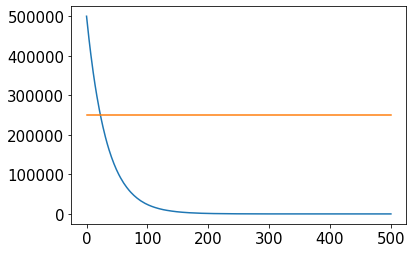

In [29]:
#plotting for my own visualisation. As such, I'm not labelling this since it's only a check and not really what I was asked to do.
plt.plot(a,b[0])
plt.plot(a, 0.5*b[0][0]*np.ones(len(a)))

In [30]:
print(np.argmin(abs(np.array(b)-0.5*N_0))) #nice one line to find time when number of neutrons closest to a half via Monte Carlo

23


In [23]:
print(np.log(0.5)/np.log(0.97)) #expected value from basic maths

22.75657306277341


So, I have that the value of B required to reduce the exit flux of neutrons to 50% of the incident flux is $23 \pm 1$ atoms thick. From basic maths, we indeed do see that the probability from theory is indeed close to 50% since $0.97^{23}=0.49630641434 \approx 0.5$. The expected value is $22.75657306277341$, which agrees with our result. I could increase the time resolution but once again our percentage uncertainty is about 4%, which I think is reasonable. We also see visually that this value does correspond to what we saw on my very basic graph.

## Task 4

Develop your program to calculate the fraction of transmitted neutrons (those that do not get absorbed) as B is varied and then plot the number of transmitted atoms versus B. Determine the value of B required to reduce the exit flux of neutrons to 1% or less.

This task is essentially the same as Task 3, so I will run it in exactly the same way. I'll make sure to put percentages on my graph this time, and to make my graph presentable.

In [24]:
N_0, times=500000, 500 #need to plot a larger range so we do indeed get to less that 0.01% and get an accurate value
a,b=General_Radioactive_Decay(N_0, p, times) #getting our lists again

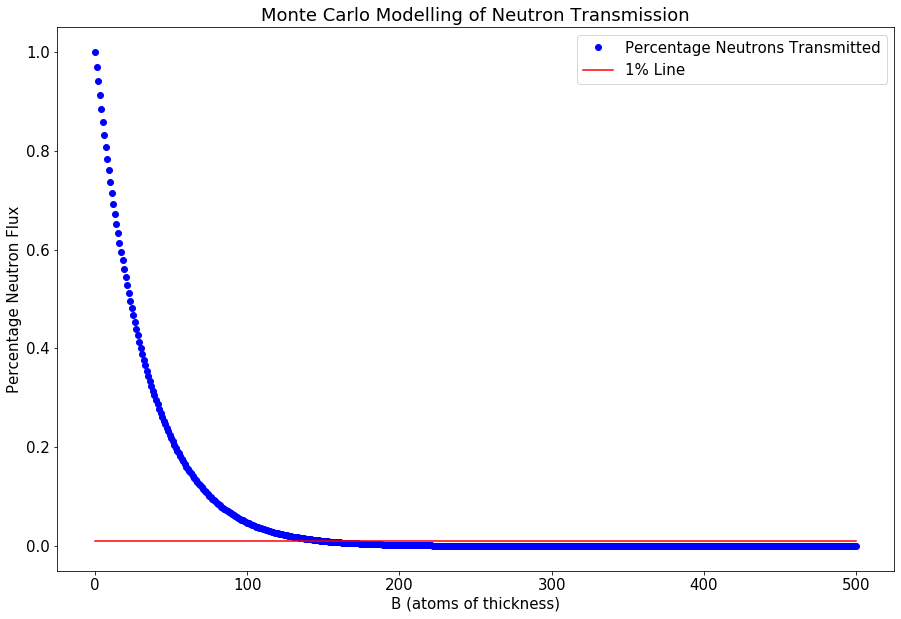

In [32]:
fig, ax = plt.subplots(figsize=(15,10)) #initialise plot as normal
mpl.rcParams.update({'font.size':15}) #make font bigger to match figsize
ax.plot(a,np.array(b[0])*1/N_0, 'bo', label="Percentage Neutrons Transmitted") #plot percentage of neutrons transmitted via Monte Carlo
ax.plot(a,0.01*np.ones(len(a)), 'r-', label="1% Line") #plot line when we're at 1%

#labelling
ax.set(xlabel='B (atoms of thickness)',ylabel= 'Percentage Neutron Flux', title="Monte Carlo Modelling of Neutron Transmission")
ax.legend()

This graph looks good to me, so I'll move on to the last step.

In [26]:
print(np.argmin(abs(np.array(b)-0.01*N_0))) #nice one line to find time when number of neutrons closest to 0.01 via Monte Carlo

151


In [27]:
print(np.log(0.01)/np.log(0.97)) #expected value from basic maths

151.19139880116785


This time, I have that the value of B required to reduce the exit flux of neutrons to 1% of the incident flux is $151 \pm 1$ atoms thick. From basic maths, we indeed do see that the probability from theory is indeed close to 1% since
$0.97^{151}=0.01005846882 \approx 0.01$. The expected value is $151.19139880116785$ seconds, which agrees with our result. Again, I could increase the time resolution but once again our percentage uncertainty is tiny and this would definitely be unnecessary in this case. We also see visually that this value does seem reasonable from my very basic graph.

It's really obvious that the the value of B required to reduce the exit flux of neutrons to 1% or less will just be any value of B equal to or greater than the value of B at which the exit flux is 1%. So, any value greater than 151 should work.